In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"C:\Users\risla\OneDrive\Desktop\EDA PROJECT\DATA\cleaned_day2.csv")
df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Total_Expense,Savings_Rate,Lifestyle_Expense,Essential_Expense,Extra_Savings,Income_Segment
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,678.292859,67.682471,0.000000,85.735517,33371.621929,0.252382,4019.511102,29352.110827,5065.090514,high
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,286.668408,6.603212,56.306874,97.388606,17181.777859,0.360288,2263.854847,14917.923012,7753.642299,middle
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,488.383423,7.290892,106.653597,138.542422,36476.154459,0.275801,3865.492522,32610.661938,6841.090203,high
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,1389.815033,193.502754,0.000000,296.041183,69837.646632,0.311643,10424.499110,59413.147522,14922.988478,very_high
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,194.117130,47.294591,67.388120,96.557076,18609.583016,0.251885,1868.524377,16741.058639,4391.601098,middle


In [21]:
# To save figures here i created a function named save_fig

def save_fig(filename):
    plt.savefig(rf"C:\Users\risla\OneDrive\Desktop\EDA PROJECT\REPORTS\figures\{filename}.png")
    print(f"{filename}.png saved")

## **Univariate Analysis**

**Histogram**

**Are most people low or high earners?**

income distribution of indians.png saved


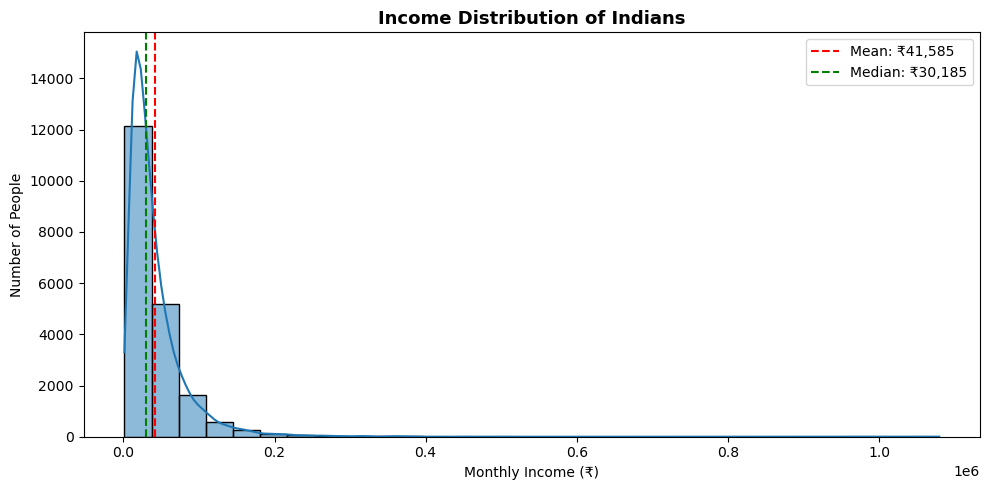

In [22]:
plt.figure(figsize=(10, 5))

sns.histplot(df['Income'], bins=30, kde=True)

# Add mean and median line
plt.axvline(df['Income'].mean(), color='red', linestyle='--', label=f"Mean: ₹{df['Income'].mean():,.0f}")
plt.axvline(df['Income'].median(), color='green', linestyle='--', label=f"Median: ₹{df['Income'].median():,.0f}")

plt.title('Income Distribution of Indians',fontweight='bold',fontsize=13,)
plt.xlabel('Monthly Income (₹)')
plt.ylabel('Number of People')
plt.legend()
plt.tight_layout()

save_fig('income distribution of indians')

plt.show()


#### **Insight: Income Distribution**

- The income distribution is highly **right-skewed**- most people earn low

- A small proportion of individuals earn significantly higher income (long right tail).

- Mean (₹41,585) > Median (₹30,185) — few rich people pulling average up


**Are people saving enough ?**

Savings Rate Distribution.png saved


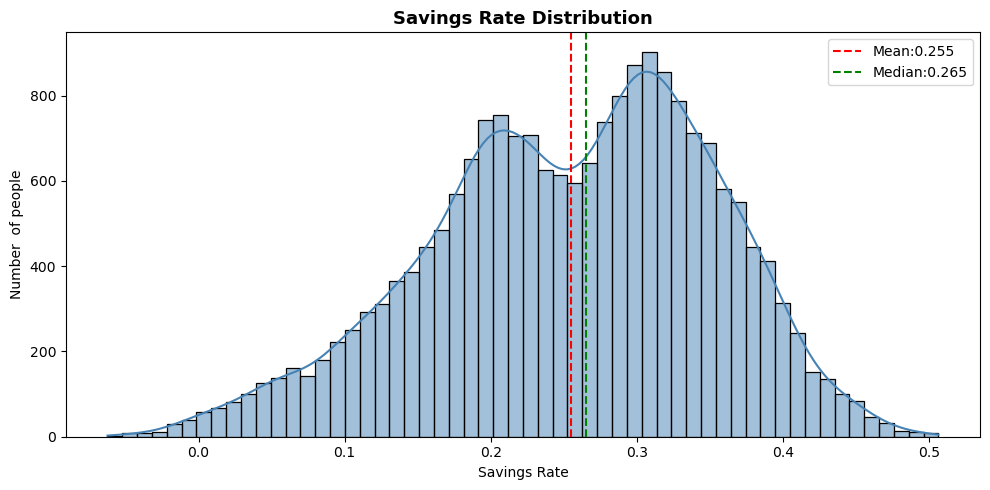

In [24]:
plt.figure(figsize=(10,5))

sns.histplot(df['Savings_Rate'],kde=True,color='steelblue')

plt.axvline(df['Savings_Rate'].mean(),color='Red',linestyle='--',label=f"Mean:{df['Savings_Rate'].mean():.3f}")
plt.axvline(df['Savings_Rate'].median(),color='Green',linestyle='--',label=f"Median:{df['Savings_Rate'].median():.3f}")

plt.title('Savings Rate Distribution',fontsize=13, fontweight='bold')
plt.xlabel('Savings Rate')
plt.ylabel('Number  of people')
plt.legend()
plt.tight_layout()

save_fig('Savings Rate Distribution')

plt.show()

### **Insight: Savings Rate Distribution**

- Distribution is roughly normal (bell shaped) — unlike income, savings rate is more evenly spread

- Median (0.265) > Mean (0.255) — slightly left skewed, a few people with very low savings pulling mean down

- Most people save between 0.2 to 0.35 (20%–35%) of their income

- Some people have near 0% savings — financially struggling group

- This suggests that the majority of the population maintains a positive    saving habit

#### **countplot**

**Which group dominates?**

Occupation Distribution.png saved


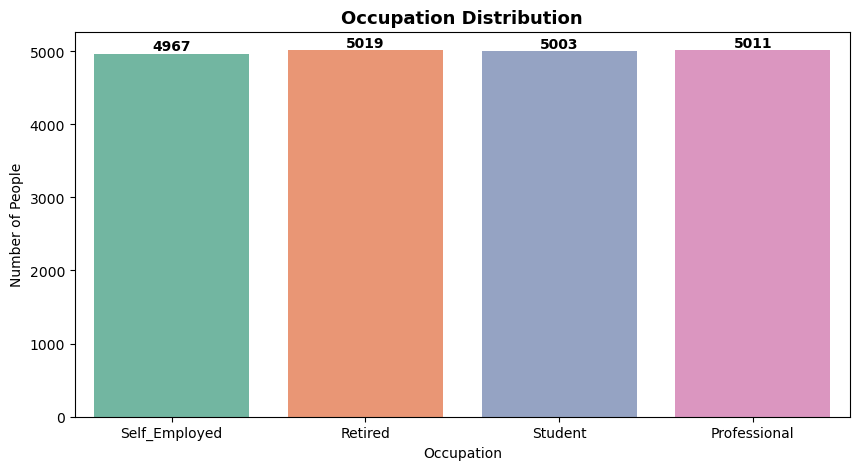

In [25]:
plt.figure(figsize=(10, 5))
ax=sns.countplot(data=df,x='Occupation',hue='Occupation',palette='Set2')
for container in ax.containers:
    ax.bar_label(container,fontweight='bold')

plt.title('Occupation Distribution',fontweight='bold',fontsize=13)
plt.xlabel('Occupation')
plt.ylabel('Number of People')

save_fig('Occupation Distribution')

plt.show()

### **Insight: Occupation Distribution**

- All 4 occupations are almost equally distributed (~5000 each)

- No occupation group dominates the dataset- Perfectly balanced

- This balanced representation allows fair comparison of financial behaviour across occupations without sampling bias.

## **Bivariate Analysis**

**Do higher earners spend more?**

**Regression plot**

Income vs Total Expense.png saved


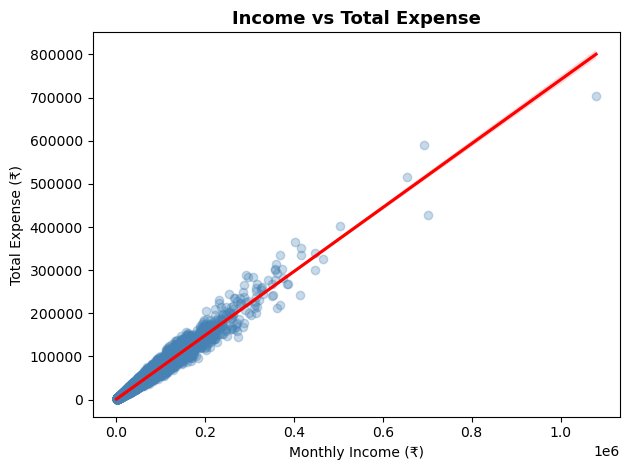

In [26]:
sns.regplot(x='Income',y='Total_Expense',data=df,
           scatter_kws={'alpha':0.3,'color':'steelblue'},
           line_kws={'color':'red'})
plt.title('Income vs Total Expense')
plt.xlabel('Income')
plt.ylabel('Total Expense')
plt.title('Income vs Total Expense', fontsize=13, fontweight='bold')
plt.xlabel('Monthly Income (₹)')
plt.ylabel('Total Expense (₹)')
plt.tight_layout()

save_fig("Income vs Total Expense")

plt.show()

### **Insight: Income vs Total Expense**

- Strong positive relationship — as income increases, expenses also increase

- The trend line is nearly diagonal — people spend a fairly consistent proportion of their income

- Few outliers on the right — very high earners with unusually high expenses

- Most people are clustered at the lower left — again confirming majority are low-middle income earners

**Which factors are strongly connected?**

**Heatmap**

Key Financial Relationships.png saved


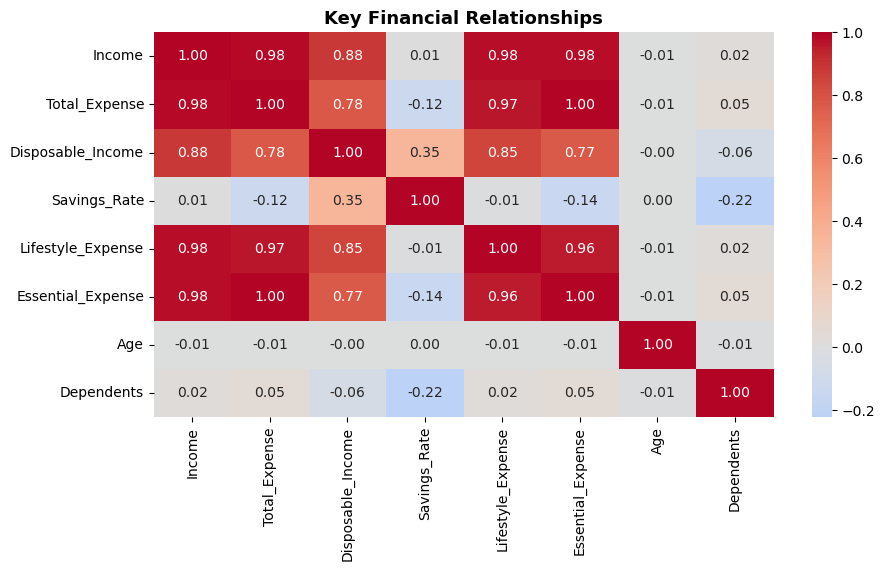

In [31]:
cols=['Income','Total_Expense','Disposable_Income','Savings_Rate','Lifestyle_Expense','Essential_Expense','Age','Dependents']

corr=df[cols].corr(numeric_only=True)
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True,fmt='.2f', cmap='coolwarm',center=0)
plt.title('Key Financial Relationships',fontsize=13, fontweight='bold')

save_fig('Key Financial Relationships')

plt.show()

### **Insight: Key Financial Relationships**
-  Income & Total Expense (0.98) — very strong, higher earners spend almost proportionally more
-  Income & Disposable Income (0.88) — higher income does lead to more leftover money
-  Savings Rate & Total Expense (-0.12) — people who spend more tend to save less 
-  Savings Rate & Dependents (-0.22) — more dependents = lower savings rate, family responsibilities hurt savings
-  Age has almost no correlation with anything — age doesn't affect spending or saving behavior in this dataset
-  Lifestyle & Essential Expense (0.96) — both grow together, people who spend more on needs also spend more on wants


**Do Tier 1 city people save less?** (lifestyle vs savings)

**Box Plot**

Savings Rate by City Tier.png saved


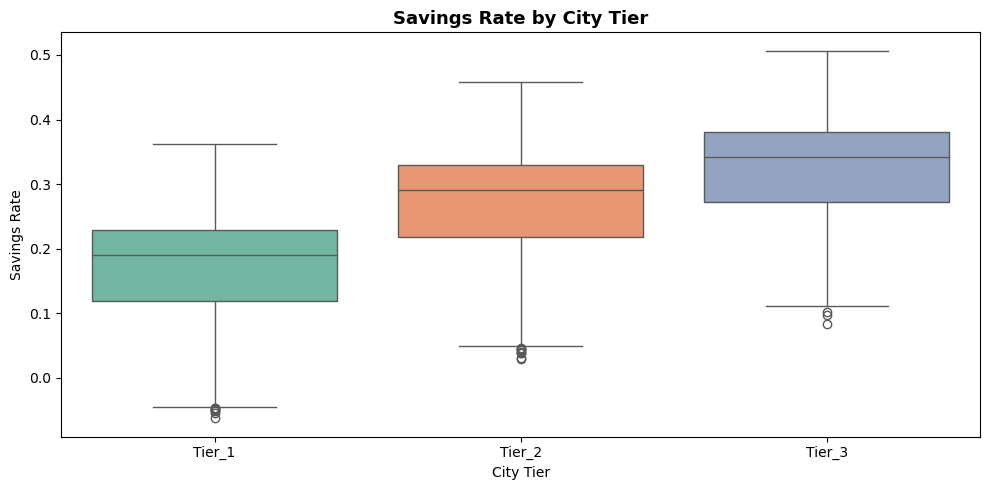

In [32]:
plt.figure(figsize=(10,5))

sns.boxplot(x='City_Tier', y='Savings_Rate',data=df, hue='City_Tier',palette='Set2' )
plt.title('Savings Rate by City Tier',fontsize=13, fontweight='bold')
plt.xlabel('City Tier')
plt.ylabel('Savings Rate')
plt.tight_layout()

save_fig('Savings Rate by City Tier')

plt.show()

### **Insight: Savings Rate by City Tier**

- Savings rate increases as city tier decreases (Tier-3 > Tier-2 > Tier-1).

- Tier 1 saves the least (median ~0.19) & Tier 3 saves the most (median ~0.33)

- Individuals in high cost-of-living cities tend to save less.

- Location therefore influences financial health independent of income.

**Are people actually achieving their desired savings goals, and does age play a role?**

**Scatter Plot**

Savings Goal vs Reality by Age.png saved


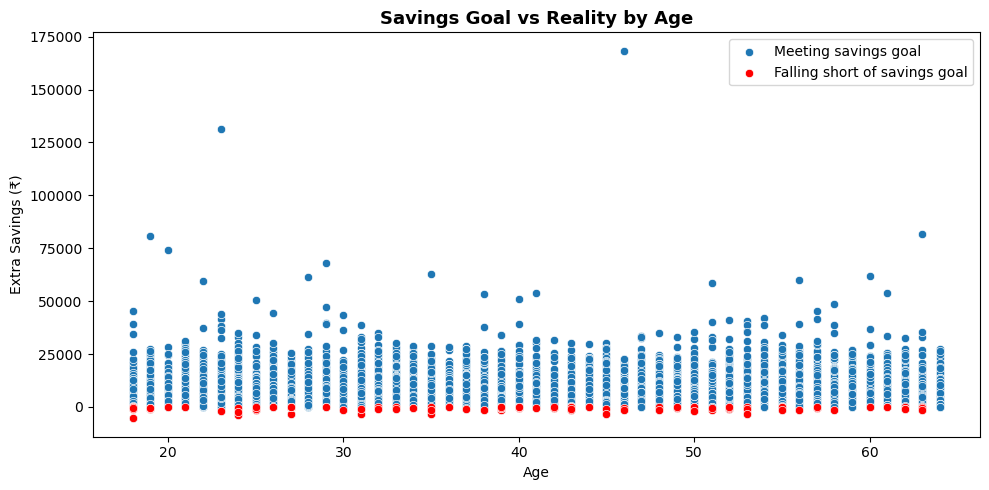

In [29]:

plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='Age',y='Extra_Savings',label='Meeting savings goal')

sns.scatterplot(data=df[df['Extra_Savings']<0],x='Age',y='Extra_Savings',color='red',
               label='Falling short of savings goal')

plt.title('Savings Goal vs Reality by Age',fontsize=13, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Extra Savings (₹)')
plt.legend()
plt.tight_layout()

save_fig('Savings Goal vs Reality by Age')

plt.show()


Average Extra Savings by City Tier.png saved


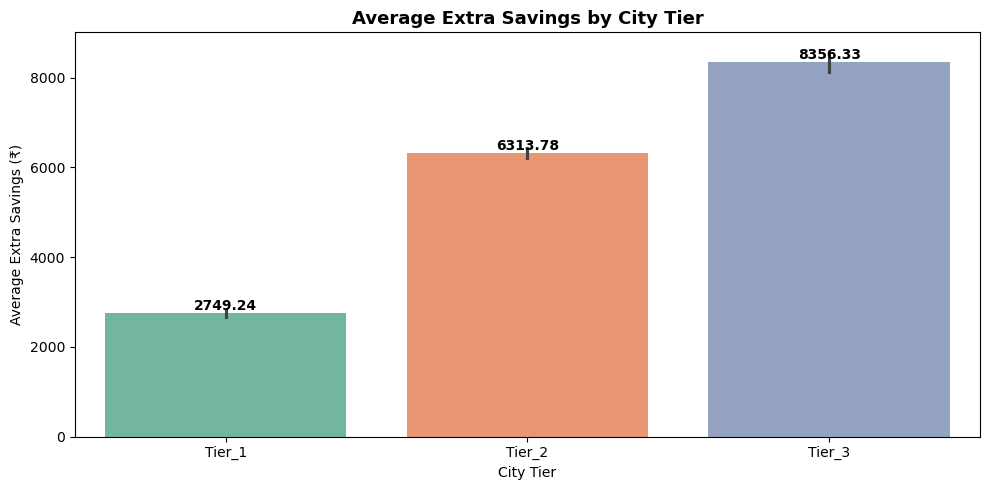

In [30]:
plt.figure(figsize=(10,5))

ax=sns.barplot(x='City_Tier',y='Extra_Savings',data=df,palette='Set2',hue='City_Tier')
for container in ax.containers:
    ax.bar_label(container,fontweight='bold')

plt.xlabel('City Tier')
plt.title('Average Extra Savings by City Tier',fontsize=13, fontweight='bold')
plt.ylabel('Average Extra Savings (₹)')
plt.tight_layout()

save_fig('Average Extra Savings by City Tier')

plt.show()

#### **Insights**:

- Tier 3 saves the most beyond their goal (₹8,356) — low cost of living helps
- Tier 1 saves the least extra (₹2,749) —  due to high city expenses 
- Clear pattern: smaller city = more extra savings beyond goal
- Confirms our earlier boxplot finding about city tier and savings
